In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "santander-customer-satisfaction"

[參考 Exploring features](https://www.kaggle.com/code/cast42/exploring-features#Add-feature-that-counts-the-number-of-zeros-in-a-row
)

In [2]:
train <- read.csv('/kaggle/input/santander-customer-satisfaction/train.csv')
test <- read.csv('/kaggle/input/santander-customer-satisfaction/test.csv')

In [3]:
head(train)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,⋯,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,39205.17,0
2,3,2,34,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,49278.03,0
3,4,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,67333.77,0
4,8,2,37,0,195,195,0,0,0,0,⋯,0,0,0,0,0,0,0,0,64007.97,0
5,10,2,39,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,117310.98,0
6,13,2,23,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,87975.75,0


In [4]:
# check NA 
# There is no NA in dataset
for (feature in colnames(train)) {
    if(colSums(is.na(train[feature]))) {
        print(colSums(is.na(train[feature])))
    }
}

for (feature in colnames(test)) {
    if(colSums(is.na(test[feature]))) {
        print(colSums(is.na(test[feature])))
    }
}


    0     1 
73012  3008 


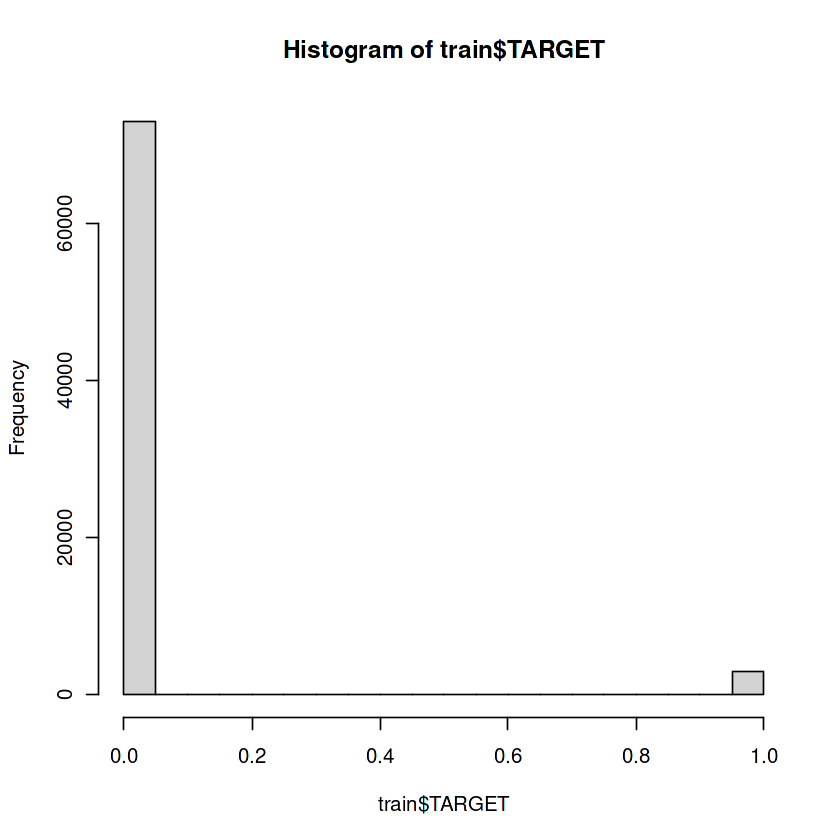

In [5]:
# the histogram shows that the dataset is unbalanced
print(table(train$TARGET))
hist(train$TARGET)

In [6]:
target_length <- length(train$TARGET)
Unsatisfied <- sum(train$TARGET)
Satisfied <- target_length - Unsatisfied

df <- data.frame("Satisfied" = Satisfied / target_length, "Unsatisfied" = Unsatisfied / target_length)

# Unsatisfied ratio is about 4%
df

Satisfied,Unsatisfied
<dbl>,<dbl>
0.9604315,0.03956853


In [7]:
value_counts <- table(train$TARGET)
value_counts / length(train$TARGET)


         0          1 
0.96043147 0.03956853 

In [8]:
# var3: nationality of the customer
value_counts <- table(train$var3)

# Top-10 most common values
head(sort(value_counts, decreasing = TRUE), 10)


      2       8 -999999       9       3       1      13       7       4      12 
  74165     138     116     110     108     105      98      97      86      85 

In [9]:
# -999999 means the nationality is unknown, replace it with mode 2 in this column
train <- train %>% 
    mutate(
        var3 = ifelse(train$var3 == -999999, 2, train$var3),
    )

value_counts <- table(train$var3)
head(sort(value_counts, decreasing = TRUE), 10)


    2     8     9     3     1    13     7     4    12     6 
74281   138   110   108   105    98    97    86    85    82 


    0     1     2     3     4     5     6     7 
19528 38147 12692  4377  1031   203    36     6 


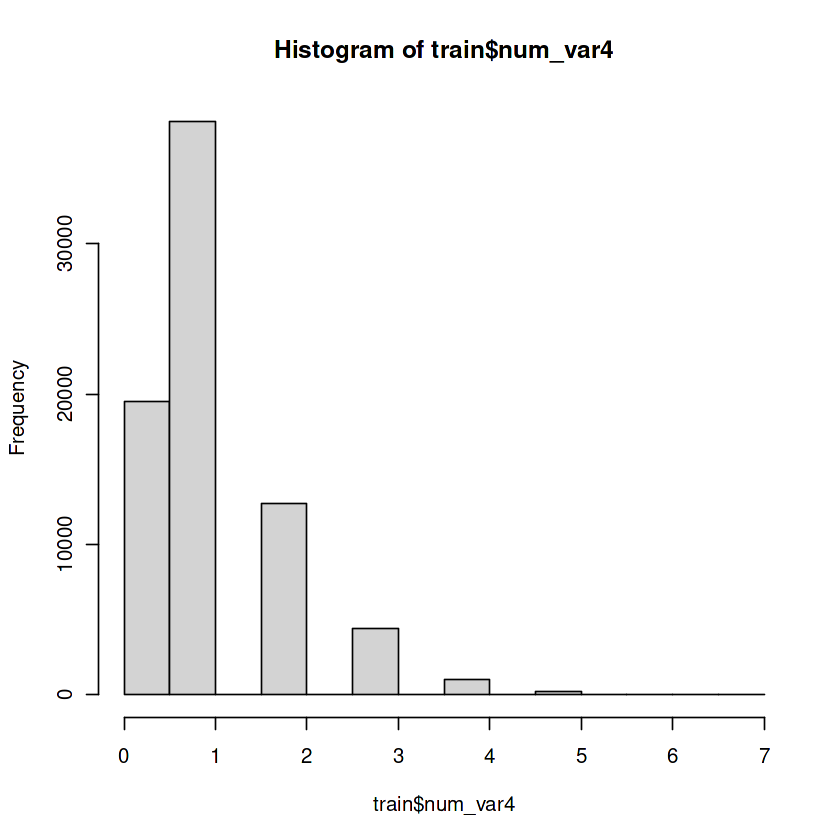

In [10]:
# num_var4 : number of bank products
# print(sort(table(train$num_var4), decreasing = TRUE))

print(table(train$num_var4))
hist(train$num_var4)

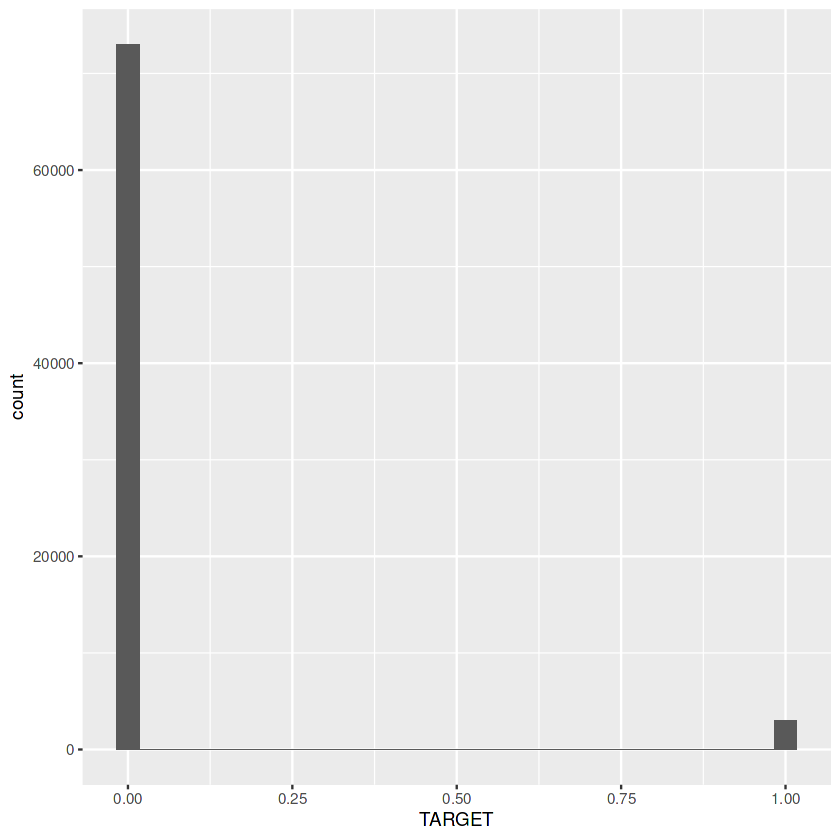

In [11]:
base_plot <- ggplot(train, aes(x = TARGET))
base_plot <- base_plot + geom_histogram(bins=30)
base_plot

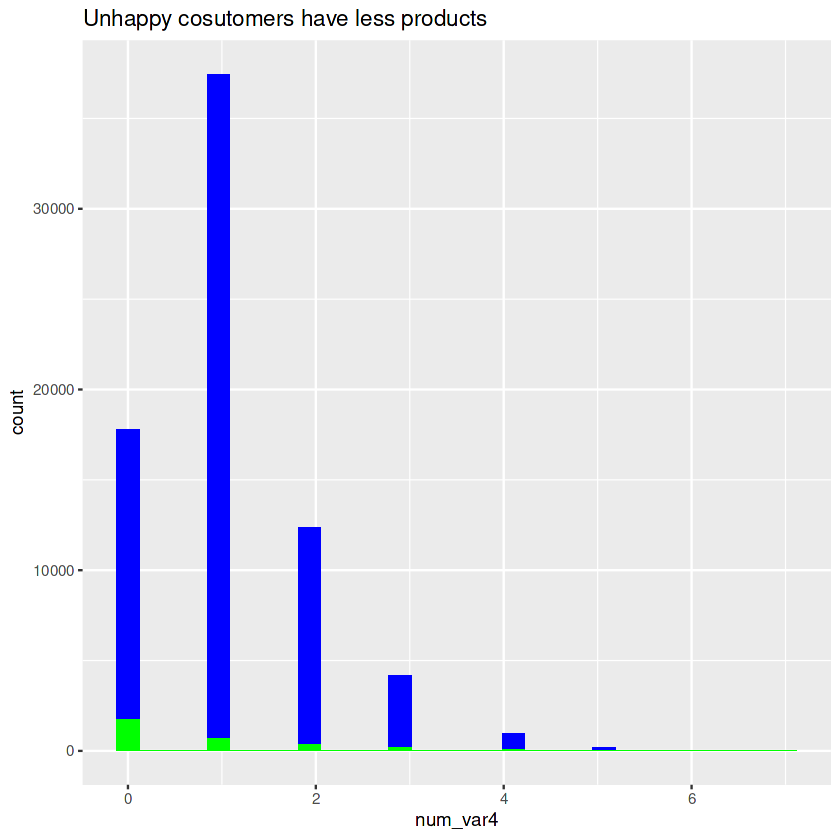

In [12]:
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )

unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Unhappy cosutomers have less products")
base_plot <- base_plot + geom_histogram(data = satisfied_df, aes(x = num_var4), bins=30, fill = "blue")
base_plot <- base_plot + geom_histogram(data = unsatisfied_df, aes(x = num_var4), bins=30, fill = "green")

base_plot

### var38

In [13]:
# var38 is suspected to be the mortage value with the bank or the value of the customer
# Important in xgboost
summary(train$var38)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    5164    67871   106409   117236   118756 22034739 

In [14]:
# How is var38 looking when customer is unhappy ?
df <- train %>% 
    filter(
        train$TARGET == 1
    )

summary(df$var38)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  11137   57161   86220   99678  117311 3988595 

[1] "Mode"
[1] 11.67259


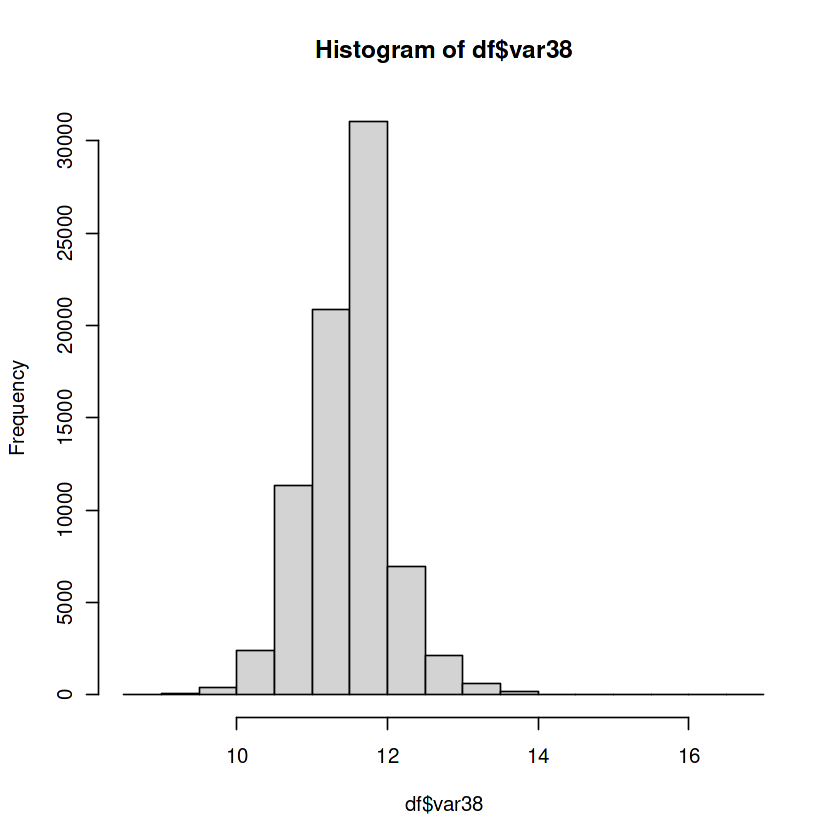

In [15]:
# Histogram for var38 in log plot
df <- train %>%
    mutate(
        var38 = log(var38 + 1)
    )

# where is the spike between 11 and 12 in the log plot ?
mode_value <- df %>%
  count(var38) %>%
  filter(n == max(n)) %>%
  pull(var38)

print("Mode")
print(mode_value)

hist(df$var38)

In [16]:
# What are the most common values for var38 ?
head(sort(table(train$var38), decreasing = TRUE), 10)

# The value 117310.979016 appears 14868 times in colum var38


117310.979016494        451931.22        463625.16         104563.8 
           14868               16               12               11 
       288997.44        236690.34         67088.31        104644.41 
              11                8                7                7 
       125722.44        128318.52 
               7                7 

[1] 117217.5

451931.22 463625.16  104563.8 288997.44 236690.34  67088.31 104644.41 125722.44 
       16        12        11        11         8         7         7         7 
128318.52 329603.97 
        7         7 


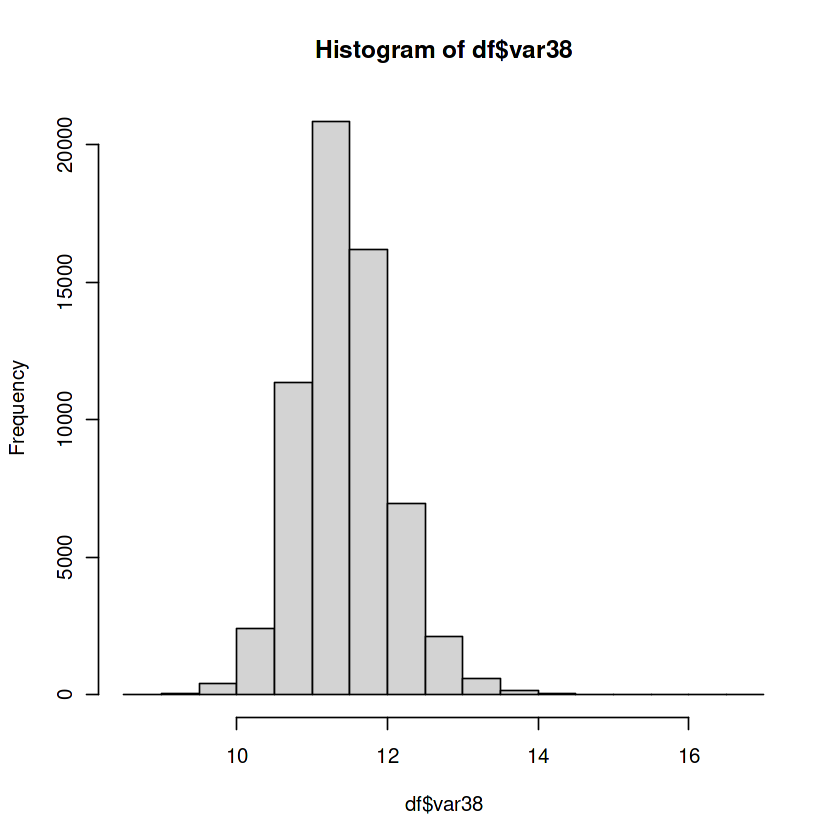

In [17]:
# the most common value is very close to the mean of the other values
df <- train %>%
    filter(
        # A safe way of comparing if two vectors of floating point numbers are/are'nt equal.
        !near(train$var38, 117310.979016494)
    )

print(mean(df$var38))
print(head(sort(table(df$var38), decreasing = TRUE), 10))

df <- df %>%
    mutate(
        var38 = log(var38 + 1)
    )

hist(df$var38)

In [18]:
# Above plot suggest we split up var38 into two variables
# var38mc == 1 when var38 has the most common value and 0 otherwise
# logvar38 is log transformed feature when var38mc is 0, zero otherwise

train <- train %>%
    mutate(
        var38mc = ifelse(near(var38, 117310.979016494), 1, 0),
    ) %>%
    mutate (
       logvar38 = ifelse(var38mc == 0, log(var38 + 1), 0)
    )

head(train[, c('var38', 'var38mc', 'logvar38')])


paste('Number of nan in var38:', sum(is.null(train$var38)))
paste('Number of nan in var38mc:', sum(is.null(train$var38mc)))
paste('Number of nan in logvar38:', sum(is.null(train$logvar38)))

,var38,var38mc,logvar38
,<dbl>,<dbl>,<dbl>
1,39205.17,0,10.57659
2,49278.03,0,10.80525
3,67333.77,0,11.11743
4,64007.97,0,11.06678
5,117310.98,1,0.00000
6,87975.75,0,11.38483


[1] "Number of nan in var38: 0"

[1] "Number of nan in var38mc: 0"

[1] "Number of nan in logvar38: 0"

### var15

In [19]:
#  According to a Kaggle form post var15 is the age of the customer.
summary(train$var15)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   23.00   28.00   33.21   40.00  105.00 

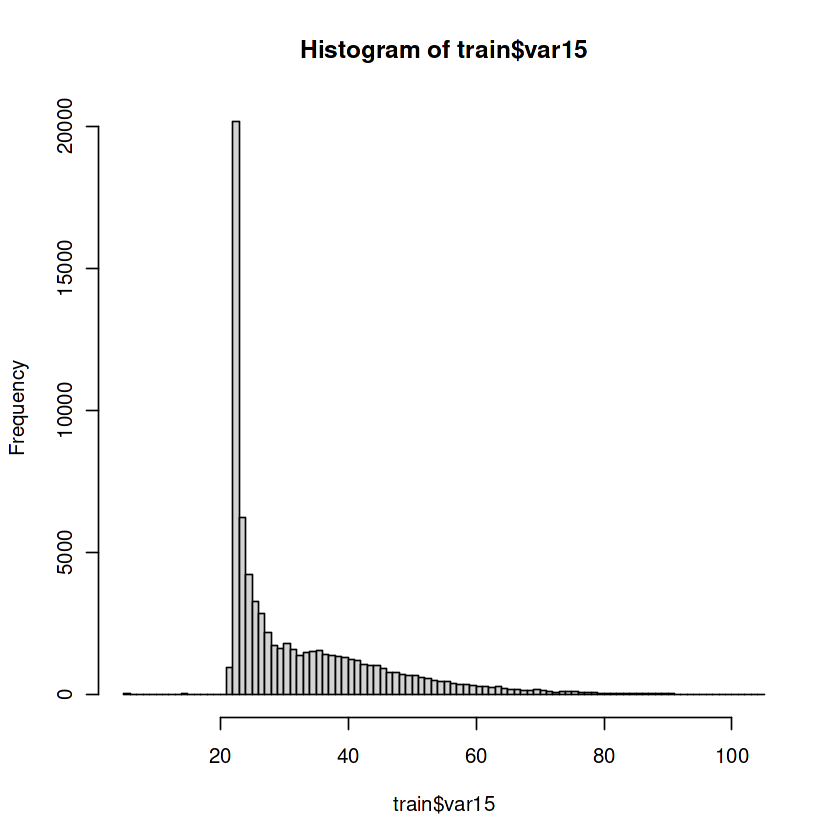

In [20]:
hist(train$var15, breaks=100)

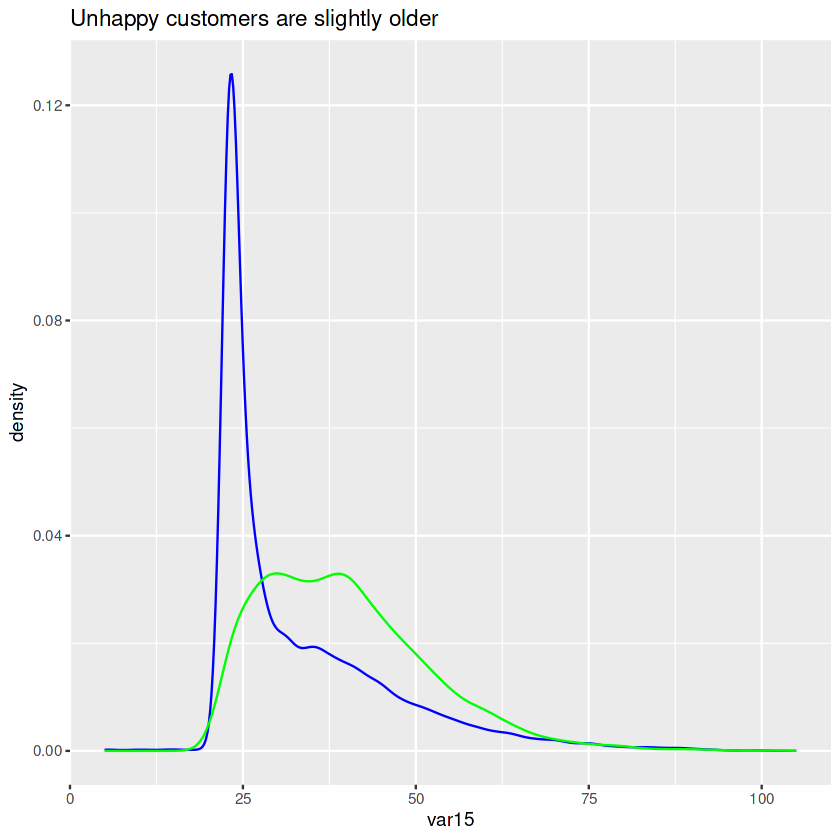

In [21]:
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )

unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Unhappy customers are slightly older")
base_plot <- base_plot + geom_density(data = satisfied_df, aes(x = var15), colour = "blue")
base_plot <- base_plot + geom_density(data = unsatisfied_df, aes(x = var15), colour = "green")
base_plot

### saldo_var30

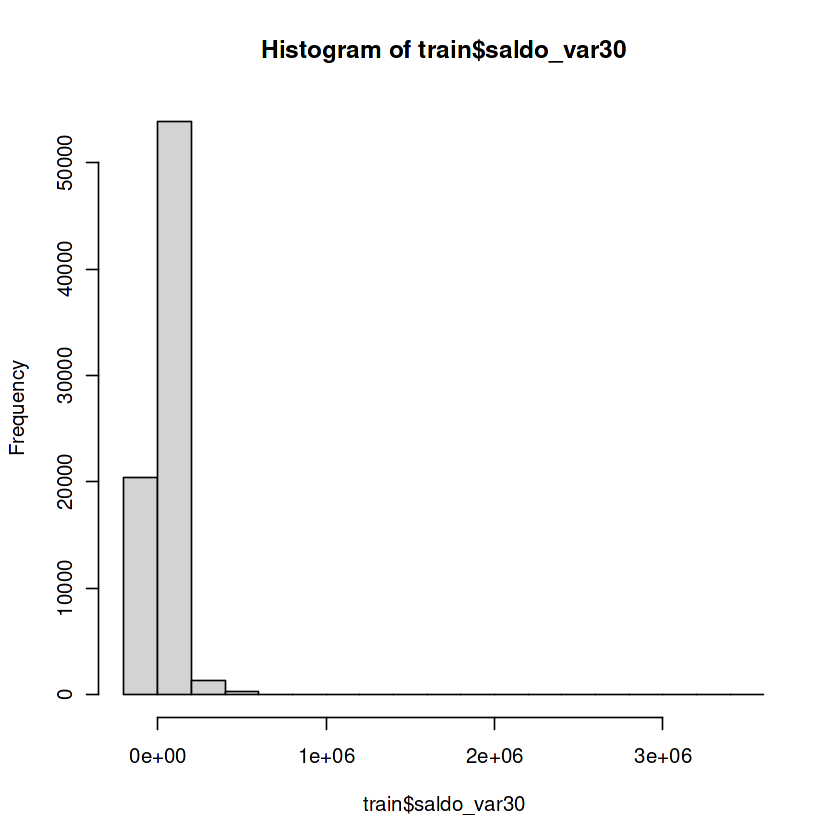

In [22]:
hist(train$saldo_var30)

In [24]:
# train$log_saldo_var30 <- ifelse(train$saldo_var30 > 0, log(train$saldo_var30 + 1), 0)

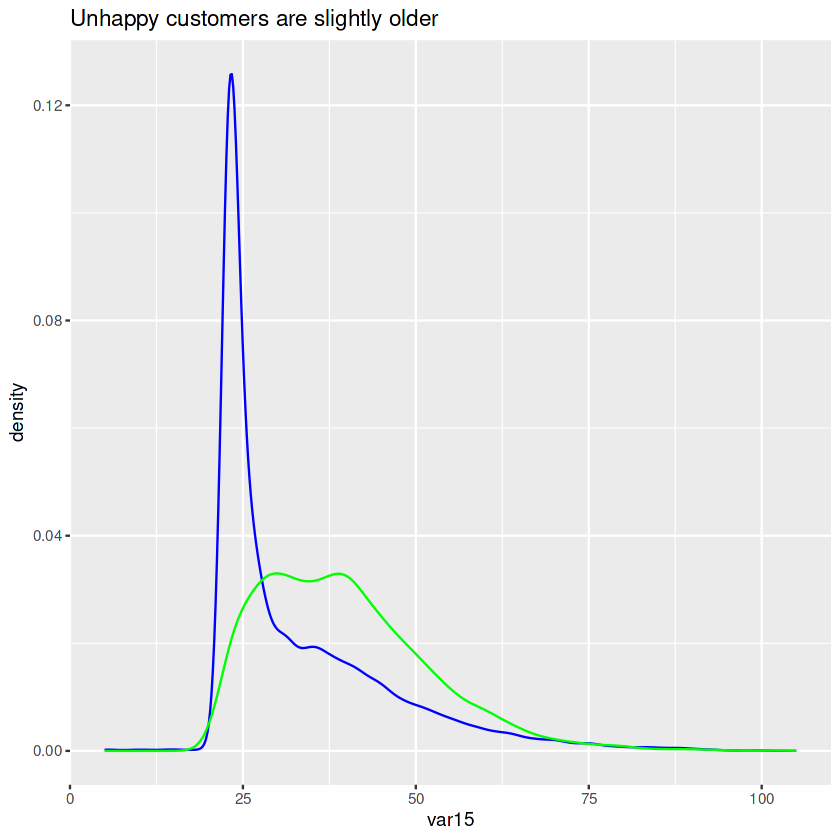

In [25]:
satisfied_df <- train %>%
    filter (
        train$TARGET == 0
    )
    
unsatisfied_df <- train %>%
    filter (
        train$TARGET == 1
    )

base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Unhappy customers are slightly older")
base_plot <- base_plot + geom_density(data = satisfied_df, aes(x = var15), colour = "blue")
base_plot <- base_plot + geom_density(data = unsatisfied_df, aes(x = var15), colour = "green")
base_plot

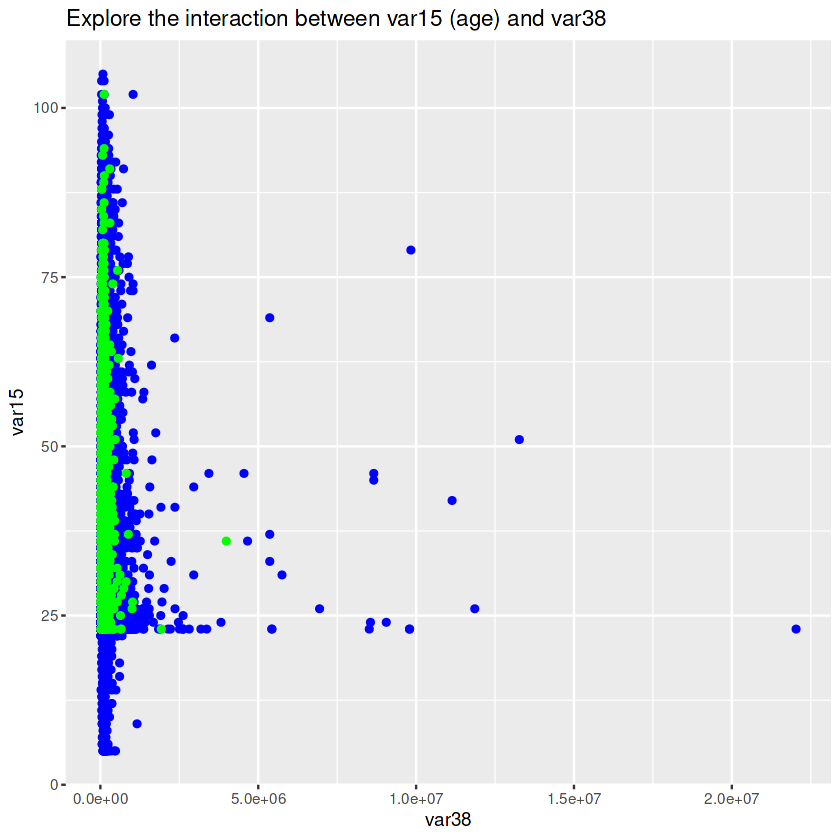

In [26]:
base_plot <- ggplot()
base_plot <- base_plot + ggtitle("Explore the interaction between var15 (age) and var38")
base_plot <- base_plot + geom_point(data = satisfied_df, aes(x = var38, y = var15), colour = "blue")
base_plot <- base_plot + geom_point(data = unsatisfied_df, aes(x = var38, y = var15), colour = "green")
base_plot